## Goal

* use the mathematical formulation of the optimization task,
* formulate the indicator function and explain how it relates to the outcome
of the classification,
* predict and explain the outcome of using different kernels,
* explain the effect of the C-value when using slack variables.

In [1]:
import numpy as np, random, math, scipy
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
k_linear = lambda x, y: np.inner(x, y)

In [55]:
def objective(inner, a):
    return (.5 * np.multiply(a, inner).sum()) - a.sum()

In [56]:
def zerofun(t, a):
    return np.dot(a, t)

In [57]:
from functools import partial

In [65]:
def calc(k, x, t, c=1):
    N = len(x)
    start = np.zeros(N)
    bounds=[(0, c) for b in range(N)]
    constraint={'type':'eq', 'fun': partial(zerofun, t)}
    p = np.array([[t[i] * t[j] * k(x[i], x[j]) for j in range(N)] for i in range(N)])
    #p = np.multiply(np.einsum('i,j->ij', t, t), np.array([[k(m, n) for m in x] for n in x]))
    cached_obj = partial(objective, p)
    return minimize(cached_obj, start, bounds=bounds, constraints=constraint)

In [66]:
np.random.seed(100)
class_a = np.concatenate((np.random.randn(10, 2) * 0.2 + [1.5, 0.5], np.random.randn(10, 2) * 0.2 + [-1.5, 0.5]))
class_b = np.random.randn(20, 2) * 0.2 + [0.0, -0.5]
inputs = np.concatenate((class_a, class_b))
targets = np.concatenate((np.ones(class_a.shape[0]), -np.ones(class_b.shape[0])))
N = inputs.shape[0]
permute = list(range(N))
random.shuffle(permute)
inputs = inputs[permute, :]
targets = targets[permute]

(-1.9463741582865122,
 1.9057015090269784,
 -0.9293661327123232,
 0.8910680428843483)

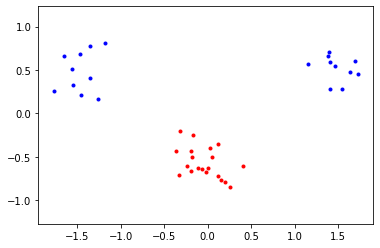

In [67]:
plt.plot([p[0] for p in class_a], [p[1] for p in class_a], 'b.')
plt.plot([p[0] for p in class_b], [p[1] for p in class_b], 'r.')
plt.axis('equal')

In [68]:
res = calc(k_linear, inputs, targets, c=None)
res

(40, 40)


     fun: 0.0
     jac: array([0.47751653, 6.00706648, 4.97730049, 5.83383881, 5.81162794,
       5.28651154, 2.69760865, 1.36602763, 7.27290861, 7.88528898,
       2.69460022, 7.03547243, 5.67231759, 5.62773544, 6.80733018,
       4.27506392, 6.32891529, 5.63511187, 5.54759533, 6.19433345,
       1.75761939, 2.63834232, 3.235181  , 4.38348183, 7.26671393,
       2.87074999, 0.75866382, 5.19022507, 6.51066536, 1.70768736,
       0.05316388, 6.98906979, 3.74500746, 3.67192435, 6.62196251,
       4.71291916, 5.65161786, 6.2344142 , 6.72946084, 3.61428257])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [69]:
a = res['x']`
indices = np.where(a > 10**-5)
a[a < 0.00001] = 0

In [63]:
ai = a[indices]
xi = inputs[indices]
ti = targets[indices]
ai

array([], dtype=float64)

In [64]:
b = (ai * ti * [k_linear(xi[0], x) for x in xi]).sum() - ti[0]
b

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
def indicator(x, y):
    return (a[indices] * targets[indices] * [k_linear(np.array(x, y), p) for p in inputs[indices]] - b).sum()

In [ ]:
xgrid=np.linspace(-5, 5)
ygrid=np.linspace(-4, 4)
grid = np.array([[indicator(x, y) for x in xgrid] for y in ygrid])
grid

In [ ]:
plt.contour(xgrid, ygrid, grid, (-1, 0, 1), colors=('red', 'black', 'blue'), linewidths=(1, 3, 1))